In [3]:
# cd /stanford-corenlp-full-2018-10-05
# java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer
from pycorenlp import StanfordCoreNLP
import csv
import os
import pandas as pd
import nltk
from nltk.tree import *
from nltk import Tree
from nltk.tag.stanford import CoreNLPPOSTagger, CoreNLPNERTagger
from nltk.parse.corenlp import CoreNLPParser
from nltk import word_tokenize, pos_tag
from collections import Counter
import codecs
import spacy
%load_ext autoreload
%autoreload 2
print os.getcwd()

/Users/chaowei/Box/oRT-FEND(programs)/subjectivity_classifier-master/SOS


In [45]:
nlp = StanfordCoreNLP('http://localhost:9000')
spacy_ner = spacy.load("en_core_web_sm")
f1 = codecs.open("MPQA/obj.txt", encoding='utf-8')
uni_lines = f1.readlines()
f = open("MPQA/obj.txt")
lines = f.readlines()

stpos, stner = CoreNLPPOSTagger(), CoreNLPNERTagger()

First_Pronouns = ['i', 'we', 'me','us','our','ours', 'ourself', 'ourselves', 'mine']
Second_Pronouns = ['you', 'your','yours', 'yourself', 'yourselves']
Third_Pronouns = ['he','his','she','her','hers','it','its','they','their','theirs','them', 'themself', 'themselves','itself']
nouns_tags = ['NN', 'NNS', 'NNP', 'NNPS']
# element = u'conversations'
# subject_person=[]
# if element in First_Pronouns:
#     subject_person.append(1)
# #elif len([w for w in element if w in Second_Pronouns]) != 0:
# elif element in Second_Pronouns:
#     subject_person.append(2)
# #elif len([w for w in element if w in Third_Pronouns]) != 0:
# elif element in Third_Pronouns:
#     subject_person.append(3)
# else:
#     subject_person.append(0)
#     #subject_person.append(0)
# print subject_person

In [ ]:
def stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag):
    indexes = triple[triple_tag]
    
    #print ('indexes',indexes)
#     print (indexes,'indexes',triple)
#     print (stpos_tags,'stpos_tags')
#     print (spacy_ner_tags,'spacy_ner_tags')
    collected_person = []
############## all persons labels ###########
##########   agent in first person -----> 1
##########  agent in second person -----> 2
##########   agent in third person -----> 3
##########         PERSON          -----> 4  People, including fictional.
##########          NORP           -----> 5  Nationalities or religious or political groups.
##########          FAC            -----> 6  Buildings, airports, highways, bridges, etc.
##########          ORG            -----> 7  Companies, agencies, institutions, etc.
##########          GPE            -----> 8  Countries, cities, states.
##########          LOC            -----> 9  Non-GPE locations, mountain ranges, bodies of water.
##########        PRODUCT          -----> 10 Objects, vehicles, foods, etc. (Not services.)
##########         EVENT           -----> 11 Named hurricanes, battles, wars, sports events, etc.
##########      WORK_OF_ART        -----> 12 Titles of books, songs, etc.
##########          LAW            -----> 13 Named documents made into laws.
##########       LANGUAGE          -----> 14 Any named language.
##########         DATE            -----> 15 Absolute or relative dates or periods.
##########         TIME            -----> 16 Times smaller than a day.
##########       PERCENT           -----> 17 Percentage, including ”%“.
##########        MONEY            -----> 18 Monetary values, including unit.
##########       QUANTITY          -----> 19 Measurements, as of weight or distance.
##########       ORDINAL           -----> 20 “first”, “second”, etc.
##########       CARDINAL          -----> 21 Numerals that do not fall under another type.
##########       undetectable      -----> 0
#############################################
    for index in range(indexes[0], indexes[1]):
        stpos_tag = stpos_tags[index]
        #stner_tag = stner_tags[index]
        spacy_ner_tag = spacy_ner_tags[index] 
        #print ('spacy_ner_tag', index, spacy_ner_tag)

        if len(str(spacy_ner_tag)) != 0:  
            collected_person.append(4)
    else:
                collected_person.append(0)
            
#             if stner_tag[1] != 'O':
#                 #print('passed')
#                 if stner_tag[1] == 'location':
#                 collected_person.append(4)
#             else:
#                 #print('notpassed')
#                 collected_person.append(0)
    #print ('collected_person',collected_person)
    return collected_person

In [46]:
def stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag):
    indexes = triple[triple_tag]
    
    #print ('indexes',indexes)
#     print (indexes,'indexes',triple)
#     print (stpos_tags,'stpos_tags')
#     print (spacy_ner_tags,'spacy_ner_tags')
    collected_person = []
############## all persons labels ###########
##########   agent in first person -----> 1
##########  agent in second person -----> 2
##########   agent in third person -----> 3
##########         PERSON          -----> 4  People, including fictional.
##########          NORP           -----> 5  Nationalities or religious or political groups.
##########          FAC            -----> 6  Buildings, airports, highways, bridges, etc.
##########          ORG            -----> 7  Companies, agencies, institutions, etc.
##########          GPE            -----> 8  Countries, cities, states.
##########          LOC            -----> 9  Non-GPE locations, mountain ranges, bodies of water.
##########        PRODUCT          -----> 10 Objects, vehicles, foods, etc. (Not services.)
##########         EVENT           -----> 11 Named hurricanes, battles, wars, sports events, etc.
##########      WORK_OF_ART        -----> 12 Titles of books, songs, etc.
##########          LAW            -----> 13 Named documents made into laws.
##########       LANGUAGE          -----> 14 Any named language.
##########         DATE            -----> 15 Absolute or relative dates or periods.
##########         TIME            -----> 16 Times smaller than a day.
##########       PERCENT           -----> 17 Percentage, including ”%“.
##########        MONEY            -----> 18 Monetary values, including unit.
##########       QUANTITY          -----> 19 Measurements, as of weight or distance.
##########       ORDINAL           -----> 20 “first”, “second”, etc.
##########       CARDINAL          -----> 21 Numerals that do not fall under another type.
##########       undetectable      -----> 0
#############################################
    for index in range(indexes[0], indexes[1]):
        stpos_tag = stpos_tags[index]
        #stner_tag = stner_tags[index]
        spacy_ner_tag = spacy_ner_tags[index] 
        #print ('spacy_ner_tag', index, spacy_ner_tag)

        if len(str(spacy_ner_tag)) != 0:  
            #print (spacy_ner_tag,'spacy_ner_tag')
            if str(spacy_ner_tag) == u'PERSON':
                collected_person.append(4)
            elif str(spacy_ner_tag) == u'NORP':
                collected_person.append(5)
            elif str(spacy_ner_tag) == u'FAC':
                collected_person.append(6)
            elif str(spacy_ner_tag) == u'ORG':
                collected_person.append(7)
            elif str(spacy_ner_tag) == u'GPE':
                collected_person.append(8)
            elif str(spacy_ner_tag) == u'LOC':
                collected_person.append(9)
            elif str(spacy_ner_tag) == u'PRODUCT':
                collected_person.append(10)
            elif str(spacy_ner_tag) == u'EVENT':
                collected_person.append(11)
            elif str(spacy_ner_tag) == u'WORK_OF_ART':
                collected_person.append(12)
            elif str(spacy_ner_tag) == u'LAW':
                collected_person.append(13)
            elif str(spacy_ner_tag) == u'LANGUAGE':
                collected_person.append(14)
            elif str(spacy_ner_tag) == u'DATE':
                collected_person.append(15)
            elif str(spacy_ner_tag) == u'TIME':
                collected_person.append(16)
            elif str(spacy_ner_tag) == u'PERCENT':
                collected_person.append(17)
            elif str(spacy_ner_tag) == u'MONEY':
                collected_person.append(18)
            elif str(spacy_ner_tag) == u'QUANTITY':
                collected_person.append(19)
            elif str(spacy_ner_tag) == u'ORDINAL':
                collected_person.append(20)
            elif str(spacy_ner_tag) == u'CARDINAL':
                collected_person.append(21)
                    
        else:
                collected_person.append(0)
            
#             if stner_tag[1] != 'O':
#                 #print('passed')
#                 if stner_tag[1] == 'location':
#                 collected_person.append(4)
#             else:
#                 #print('notpassed')
#                 collected_person.append(0)
    #print ('collected_person',collected_person)
    return collected_person


In [47]:
def run_object(varible):
    if len(varible) == 0:
        return 0
    else:
        if 1 in varible:
            return 1
        elif 2 in varible:
            return 2
        elif 3 in varible:
            return 3
        elif len(Counter(varible)) > 1:
            while 0 in varible:       
                varible.remove(0)  
            #print varible,'varible'
            return Counter(varible).most_common(1)[0][0]
        else:
            return Counter(varible).most_common(1)[0][0]

In [48]:
def persons_check(triple, stpos_tags, spacy_ner_tags):
    tokenized_triple = [word_tokenize(triple['subject']),
                        word_tokenize(triple['relation']), 
                        word_tokenize(triple['object'])]
    triple_tag = ['subjectSpan', 
                 'relationSpan',
                 'objectSpan']
    
#     print('tokenized_triple',stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag[0]))
    subject_person = [] 
    for element in tokenized_triple[0]:       
        if element in First_Pronouns:
            subject_person.append(1)
        #elif len([w for w in element if w in Second_Pronouns]) != 0:
        elif element in Second_Pronouns:
            subject_person.append(2)
        #elif len([w for w in element if w in Third_Pronouns]) != 0:
        elif element in Third_Pronouns:
            subject_person.append(3)
#         elif 4 in stpos_tag_check(stpos_tags, stner_tags, triple, triple_tag[0]):
#             subject_person.append(4)
        elif len(stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag[0])) != 0:
            #print ('stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag[0])',stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag[0]))
            subject_person.append(Counter([a for a in stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag[0]) if a != None]).most_common(1)[0][0]) 
        else:
            subject_person.append(0)
            #subject_person.append(0)
    
    
    object_person = []
    for element in tokenized_triple[2]:
        if element in First_Pronouns:        
            object_person.append(1)
        elif element in Second_Pronouns:
            object_person.append(2)
        elif element in Third_Pronouns:
            object_person.append(3)
        elif len(stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag[2])) != 0:
            #print('Counter([a for a in spacy_ner_tags if len(a)!=0]).most_common(1)[0][1]',stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag[2]))
            object_person.append(Counter([a for a in stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag[2]) if a != None]).most_common(1)[0][0]) 
            #print (Counter([a for a in spacy_ner_tags if len(a)!=0]).most_common(1))
#         elif 4 in stpos_tag_check(stpos_tags, spacy_ner_tags, triple, triple_tag[2]):
#                 object_person.append(4)
        else:
            object_person.append(0)
#     print ('subject_person',subject_person, tokenized_triple[0])
#     print ('object_person',object_person, tokenized_triple[2])    
    subject_person = run_object(subject_person) 
    object_person = run_object(object_person)

    return subject_person, object_person, triple['subjectSpan'][0]

In [49]:
def tense_detector(stpos_tags, openie, sub_location):
    #print(stpos_tags)
    all_tense = []
    for triple in openie:
        #print("triple", [triple['subject'], triple['relation'], triple['object']])
        if sub_location > 4:
            all_tense.append(7)
        
        elif sub_location in range(triple['subjectSpan'][0], triple['subjectSpan'][1]+1):
            #print(sub_location, triple)
            predicate_index = triple['relationSpan']
            only_stpos_tag = [v for k,v in stpos_tags[predicate_index[0]:predicate_index[1]+1]]
            #print ("stpos_tags", stpos_tags, [w for w in only_stpos_tag])
                        
            ############# all tences labels##############
            ##########  Future Perfect Continuous --------> 1
            ##########        Future Perfect      --------> 2
            ##########       Future Continuous    --------> 3
            ##########          Future Simple     --------> 4
            ##########  present Perfect Continuous --------> 5
            ##########        present Perfect      --------> 6
            ##########       present Continuous    --------> 7
            ##########          present Simple     --------> 8            
            ##########  past Perfect Continuous --------> 9
            ##########        past Perfect      --------> 10
            ##########       past Continuous    --------> 11
            ##########          past Simple     --------> 12
            ##########          Undetectable      --------> 0
            #############################################
            if "MD" in [w for w in only_stpos_tag]:
                if set(["VB", "VBN", "VBG"]).issubset(set(only_stpos_tag)) == True: #Future Perfect Continuous
                    all_tense.append(1)
                    #print 'Future Perfect Continuous'
                    
                elif set(["VB", "VBN"]).issubset(set(only_stpos_tag)) == True: #Future Perfect 
                    all_tense.append(2)
                    #print 'Future Perfect'
                elif set(["VB", "VBG"]).issubset(set(only_stpos_tag)) == True: #Future Continuous
                    all_tense.append(3)
                    #print 'Future Continuous'
                else: #Future
                    all_tense.append(4)
                    #print 'Future'

            elif "VBD" in [w for w in only_stpos_tag]:
                if set(["VBN", "VBG"]).issubset(set(only_stpos_tag)) == True: #Past Perfect Continuous
                    all_tense.append(9)
                    #print 'Past Perfect Continuous'
                elif set(["VBN"]).issubset(set(only_stpos_tag)) == True: #Past Perfect 
                    all_tense.append(10)
                    #print 'Past Perfect'
                elif set(["VBG"]).issubset(set(only_stpos_tag)) == True: #Past Continuous
                    all_tense.append(11)
                    #print 'Past Continuous'
                else: #Past
                    all_tense.append(12)
                    #print 'Past'

            elif "VBP" or "VBZ" in [w for w in only_stpos_tag]:
                if set(["VBN", "VBG"]).issubset(set(only_stpos_tag)) == True: #present Perfect Continuous
                    all_tense.append(5)
                    #print 'present Perfect Continuous'
                elif set(["VBN"]).issubset(set(only_stpos_tag)) == True: #present Perfect 
                    all_tense.append(6)
                    #print 'present Perfect'
                elif set(["VBG"]).issubset(set(only_stpos_tag)) == True: #present Continuous
                    all_tense.append(7)
                    #print 'present Continuous'
                else:#present 
                    all_tense.append(8)
                    #print 'present'

            else:
                all_tense.append(0)
                #print 'undetectable'
            
    if len(Counter(all_tense)) > 1:
        all_tense = [max([a for a,b in Counter(all_tense).items() if a != 0])]
    else: 
        all_tense = [a for a,b in Counter(all_tense).items()]
    
    return all_tense

In [50]:



all_data_sub_person = []
all_data_obj_person = []
all_data_tense = []
sentence_number = -1
all_data_sub_obj = []
all_data_sub_tense = []
all_data_tense_obj = []
all_data_triple = []
for line in lines: 
    sentence_number += 1
    line = line.replace("\n", '')
    line = line.replace(")", '')
    line = line.replace("(", '')
    uni_line = uni_lines[sentence_number].replace("\n", '')
    uni_line = uni_lines[sentence_number].replace(")", '')
    uni_line = uni_lines[sentence_number].replace("(", '')
    print ("No.", sentence_number+1,"sentense is being processed.------>", line.lower())
    #print ([a.ent_type_ for a in spacy_ner(uni_lines[sentence_number].replace("\n",''))])
    try:
        res = nlp.annotate(line.lower(),
                                   properties={
                                       'annotators': 'depparse, parse, openie',
                                       'outputFormat': 'json',"triple.strict":"true"
                                   })

        #print(res["sentences"][0].keys()) #all functions
        parse = res["sentences"][0]["parse"]
        openie = res["sentences"][0]["openie"]
        stpos_tags = stpos.tag(line.split())
        stner_tags = stner.tag(line.split())
        pos_tags = pos_tag(word_tokenize(line))
        spacy_ner_tags = [a.ent_type_ for a in spacy_ner(uni_line)]
    except:
        print("No.",sentence_number+1,"sentence can't be analyzed")
        continue
    #print("parse",parse)
    #print("openie",openie)
    #print("pos_tags",pos_tags)
#     print("stner_tags",stner_tags)
    #print('*********************************************************************************************************************')
    sum_subs = []
    sum_subs_location = []
    sum_objs = []
    sum_verbs= []
    sub_obj = []
    sub_tense = []
    tense_obj = []
    sub_tense_obj = []
    try:
        for triple in openie:
            #print ('triple',triple)
            sub_person, obj_person, sub_location = persons_check(triple, stpos_tags, spacy_ner_tags)
            #print (sub_person, obj_person,sub_location, 'sub_person, obj_person')

    # experiment 1 : test subject only
            sum_subs_location.append(sub_location)
            sum_subs.append(sub_person)
    # experiment 2 : test object only
            sum_objs.append(obj_person) 
    #         break
    #     break
    except:
        continue
    try:
        # experiment 1 : test subject only 
        external_sub = sum_subs[sum_subs_location.index(min(sum_subs_location))] 
        
        # experiment 2 : test object only  
        selected_objs_person = [[k for k,v in Counter(sum_objs).items() if v == max(Counter(sum_objs).values())][-1]]
#         if len(selected_objs_person) > 1:
#             print ('selected_objs_person',selected_objs_person)
#             selected_objs_person.remove(0)
        #if 1 in selected_objs_person:
#             print ("first person:", stpos_tags.index(min(sum_subs_location)))
        # experiment 3 : test subject & tense
        tense = tense_detector(pos_tags, openie, min(sum_subs_location))
        
        all_data_sub_person.append(external_sub)
        all_data_obj_person += selected_objs_person
        all_data_tense += tense
        #print ("XXXXX",external_sub, selected_objs_person,"".join(selected_objs_person),tense,"".join(tense))
        all_data_sub_obj.append([external_sub] +selected_objs_person)
        all_data_sub_tense.append([external_sub]+tense)
        all_data_tense_obj.append(tense+selected_objs_person)
        all_data_triple.append([external_sub]+ tense+selected_objs_person)
        #print ([external_sub], tense, selected_objs_person
    except:
        #print("fail to read document, the program doesn't work")
        continue
       
    
#     if len(all_data_sub_person) == len(all_data_obj_person) == len(all_data_tense):
#             all_data_sub_person.append(external_sub)
#             all_data_obj_person += selected_objs_person
#             all_data_tense += tense
#     else:
#         continue
    print('*********************************************************************************************************************')
    if len([external_sub]+ tense+selected_objs_person) > 3:
        print ('wrong processing')  
print('all_data_sub_person', len(all_data_sub_person), all_data_sub_person)  
print('all_data_obj_person', len(all_data_obj_person), all_data_obj_person)
print('all_data_tense',len(all_data_tense), all_data_tense)
print('all_data_sub_obj',len(all_data_sub_obj),all_data_sub_obj)
print('all_data_sub_tense',len(all_data_sub_tense),all_data_sub_tense)
print('all_data_tense_obj',len(all_data_tense_obj),all_data_tense_obj)
print('all_data_triple', len(all_data_triple),all_data_triple)
    
    
    
f.close()

('No.', 1, 'sentense is being processed.------>', 'nowhere is the human being more truly revealed than in his letters.')
*********************************************************************************************************************
('No.', 2, 'sentense is being processed.------>', 'the letters of mark twain are peculiarly of the revealing sort.')
*********************************************************************************************************************
('No.', 3, 'sentense is being processed.------>', 'he was a man of few restraints and of no affectations.')
('No.', 4, 'sentense is being processed.------>', 'in his correspondence, as in his talk, he spoke what was in his mind, untrammeled by literary conventions.')
*********************************************************************************************************************
('No.', 5, 'sentense is being processed.------>', 'necessarily such a collection does not constitute a detailed life story, but is supplemen

*********************************************************************************************************************
('No.', 43, 'sentense is being processed.------>', 'where in the nation can i get that portrait?')
*********************************************************************************************************************
('No.', 44, 'sentense is being processed.------>', 'there is my uncle.')
('No.', 45, 'sentense is being processed.------>', 'he wants a copy.')
*********************************************************************************************************************
('No.', 46, 'sentense is being processed.------>', 'he wants a copy--and i want him to have a copy.')
*********************************************************************************************************************
('No.', 47, 'sentense is being processed.------>', 'and i want you to send a copy to the man that shot my dog.')
**********************************************************************

*********************************************************************************************************************
('No.', 89, 'sentense is being processed.------>', 'days and leave me mentally and physically fagged out at the end.')
*********************************************************************************************************************
('No.', 90, 'sentense is being processed.------>', 'i was careful not to inflict the ms upon you until i had thoroughly and painstakingly revised it.')
('No.', 91, 'sentense is being processed.------>', 'therefore, the only faults left were those that would discover themselves to others, not me--and these you had pointed out.')
*********************************************************************************************************************
('No.', 92, 'sentense is being processed.------>', 'there was one expression which perhaps you overlooked.')
('No.', 93, 'sentense is being processed.------>', 'no exclamation point.')
('No.', 94, 

('No.', 129, 'sentense is being processed.------>', 'show him the canvassing specimens and beseech him to subscribe.')
('No.', 130, 'sentense is being processed.------>', "clemens does not tell us here the nature of carlton's      insult, forgiveness of which he was not yet qualified to grant, but      there are at least two stories about it, or two halves of the same      incident, as related afterward by clemens and canton.")
('No.', 131, 'sentense is being processed.------>', 'to w. d. howells, in boston:                                          hartford, apl.')
*********************************************************************************************************************
('No.', 132, 'sentense is being processed.------>', '25, 1876 my dear howells,--thanks for giving me the place of honor.')
('No.', 133, 'sentense is being processed.------>', 'bliss made a failure in the matter of getting tom sawyer ready on time-- the engravers assisting, as usual.')
************************

('No.', 173, 'sentense is being processed.------>', 'l. clemens.')
('No.', 174, 'sentense is being processed.------>', 'he was in the midst of campaign activities, he said,      writing a life of hayes, and gaily added: "you know i wrote the life      of lincoln, which elected him."')
*********************************************************************************************************************
('No.', 175, 'sentense is being processed.------>', 'mark twain, in his hillside study, was busy enough.')
*********************************************************************************************************************
('No.', 176, 'sentense is being processed.------>', 'i shall read that biography, though the letter of acceptance was amply sufficient to corral my vote without any further knowledge of the man.')
*********************************************************************************************************************
('No.', 177, 'sentense is being processed.------>', 'whi

*********************************************************************************************************************
('No.', 209, 'sentense is being processed.------>', 'clemens was a strong republican in those days, as his letters of      this period show.')
*********************************************************************************************************************
('No.', 210, 'sentense is being processed.------>', 'his mention of the "caves" in the next is another      reference to "the canvasser\'s tale."')
*********************************************************************************************************************
('No.', 211, 'sentense is being processed.------>', 'to w. d. howells, in boston:                                               sept.')
*********************************************************************************************************************
('No.', 212, 'sentense is being processed.------>', '14, 1876.')
('No.', 213, 'sentense is being proc

*********************************************************************************************************************
('No.', 250, 'sentense is being processed.------>', 'fortunately a good deal of experience of men enabled me to choose my residence wisely.')
*********************************************************************************************************************
('No.', 251, 'sentense is being processed.------>', 'i live in the freest corner of the country.')
('No.', 252, 'sentense is being processed.------>', 'there are no social disabilities between me and my democratic personal friends.')
('No.', 253, 'sentense is being processed.------>', "don't you ever come to new york again and not run up here to see me.")
('No.', 254, 'sentense is being processed.------>', "will's were always of this stamp.")
('No.', 255, 'sentense is being processed.------>', 'i stood it years.')
******************************************************************************************************

*********************************************************************************************************************
('No.', 289, 'sentense is being processed.------>', 'his mother, jane clemens, a resolute, wiry woman      of forty-nine, had put together his few belongings.')
*********************************************************************************************************************
('No.', 290, 'sentense is being processed.------>', "the will bowen mentioned is a former playmate, one of      tom sawyer's outlaw band.")
*********************************************************************************************************************
('No.', 291, 'sentense is being processed.------>', 'he had gone on the river to learn      piloting with an elder brother, the "captain."')
*********************************************************************************************************************
('No.', 292, 'sentense is being processed.------>', '"ella" was samuel clemens\'s cous

*********************************************************************************************************************
('No.', 326, 'sentense is being processed.------>', 'truly your brother,                                         saml l. clemens.')
*********************************************************************************************************************
('No.', 327, 'sentense is being processed.------>', 'he was in philadelphia when he wrote the nest letter that has come      down to us, and apparently satisfied with the change.')
*********************************************************************************************************************
('No.', 328, 'sentense is being processed.------>', 'it is a      letter to orion clemens, who had disposed of his paper, but      evidently was still in hannibal.')
*********************************************************************************************************************
('No.', 329, 'sentense is being processed.------>

*********************************************************************************************************************
('No.', 363, 'sentense is being processed.------>', 'you must write often.')
('No.', 364, 'sentense is being processed.------>', "don't say my letters are not long enough.")
('No.', 365, 'sentense is being processed.------>', 'tell jim wolfe to write.')
('No.', 366, 'sentense is being processed.------>', 'tell all the boys where i am, and to write.')
('No.', 367, 'sentense is being processed.------>', 'jim robinson, particularly.')
('No.', 368, 'sentense is being processed.------>', 'i wrote to him from n. y.  tell me all that is going on in h--l.                                    truly your brother                                                        sam.')
('No.', 369, 'sentense is being processed.------>', 'those were primitive times.')
*********************************************************************************************************************
('No.', 370

*********************************************************************************************************************
('No.', 405, 'sentense is being processed.------>', 'the river packet was leaving in a few hours      for muscatine, iowa, where his mother and his two brothers were now      located.')
*********************************************************************************************************************
('No.', 406, 'sentense is being processed.------>', 'he paid his sister a brief visit, and caught the boat.')
*********************************************************************************************************************
('No.', 407, 'sentense is being processed.------>', 'worn-out, he dropped into his berth and slept the thirty-six hours      of the journey.')
*********************************************************************************************************************
('No.', 408, 'sentense is being processed.------>', 'it was early when-he arrived--too ea

*********************************************************************************************************************
('No.', 443, 'sentense is being processed.------>', 'he laid aside his ms and said, "come, let us go and see your father\'s statue.')
*********************************************************************************************************************
('No.', 444, 'sentense is being processed.------>', 'that is--is he your father?"')
('No.', 445, 'sentense is being processed.------>', '"no, he is my husband."')
*********************************************************************************************************************
('No.', 446, 'sentense is being processed.------>', 'so this child was married, you see.')
*********************************************************************************************************************
('No.', 447, 'sentense is being processed.------>', 'this was a saturday.')
('No.', 448, 'sentense is being processed.------>', 'next day wa

*********************************************************************************************************************
('No.', 487, 'sentense is being processed.------>', "if you will, i will snatch osgood down from boston, and you won't have to go there at all unless you want to.")
('No.', 488, 'sentense is being processed.------>', "please to bear this strictly in mind, and don't forget it.")
('No.', 489, 'sentense is being processed.------>', 'sincerely yours                                    s. l. clemens.')
('No.', 490, 'sentense is being processed.------>', "the reader may remember that during mark twain's great      lecture engagement in london, winter of 1873-74, stoddard lived with      him, acting as his secretary.")
*********************************************************************************************************************
('No.', 491, 'sentense is being processed.------>', 'at a later period in his life he      lived for several years with the great telephone magna

*********************************************************************************************************************
('No.', 530, 'sentense is being processed.------>', 'i did wish you were here to see these things.')
*********************************************************************************************************************
('No.', 531, 'sentense is being processed.------>', 'good night, sweetheart, and give my respects to the cubs.')
*********************************************************************************************************************
('No.', 532, 'sentense is being processed.------>', 'saml.')
('No.', 533, 'sentense is being processed.------>', 'clemens, returning to hartford, wrote him a      letter that explains itself.')
*********************************************************************************************************************
('No.', 534, 'sentense is being processed.------>', "to w. d. howells, in boston:                                       

*********************************************************************************************************************
('No.', 578, 'sentense is being processed.------>', 'indeed they are not.')
('No.', 579, 'sentense is being processed.------>', "no, i don't forget some things as easily as i do others.")
('No.', 580, 'sentense is being processed.------>', 'yes, it was pretty hot weather.')
*********************************************************************************************************************
('No.', 581, 'sentense is being processed.------>', "now here, when a person is going to die, he is always in a sweat about where he is going to; but in keokuk of course they don't care, because they are fixed for everything.")
*********************************************************************************************************************
('No.', 582, 'sentense is being processed.------>', 'it has set me reflecting, it has taught me a lesson.')
***********************************

*********************************************************************************************************************
('No.', 624, 'sentense is being processed.------>', "perhaps you didn't know you were begging.")
('No.', 625, 'sentense is being processed.------>', 'i would not use that argument--it makes the user a fool.')
*********************************************************************************************************************
('No.', 626, 'sentense is being processed.------>', 'mailed answer:  dear sir,--your favor of recent date is received, but i am obliged by press of work to decline.')
('No.', 627, 'sentense is being processed.------>', 'apparently      these inducements did not appeal to mark twain.')
('No.', 628, 'sentense is being processed.------>', "unmailed answer:                                               hartford, sept. 8, '87.")
*********************************************************************************************************************
('No.', 6

('No.', 668, 'sentense is being processed.------>', 'dear sir,--as i understand it, the position of the u. s. government is this: if a person be captured on the border with counterfeit bonds in his hands--bonds of the n. y. central railway, for instance--the procedure in his case shall be as follows:  1.')
*********************************************************************************************************************
('No.', 669, 'sentense is being processed.------>', 'if the n. y. c. have not previously filed in the several police offices along the border, proof of ownership of the originals of the bonds, the government officials must collect a duty on the counterfeits, and then let them go ahead and circulate in this country.')
('No.', 670, 'sentense is being processed.------>', '2.')
('No.', 671, 'sentense is being processed.------>', 'but if there is proof already on file, then the n. y. c.  may pay the duty and take the counterfeits.')
****************************************

*********************************************************************************************************************
('No.', 708, 'sentense is being processed.------>', 'familiar?')
('No.', 709, 'sentense is being processed.------>', 'yes, and i have shoveled silver tailings in a quartz-mill a couple of weeks, and acquired the last possibilities of culture in that direction.')
*********************************************************************************************************************
('No.', 710, 'sentense is being processed.------>', "and i've been a silver miner and know how to dig and shovel and drill and put in a blast.")
*********************************************************************************************************************
('No.', 711, 'sentense is being processed.------>', 'and so i know the mines and the miners interiorly as well as bret harte knows them exteriorly.')
****************************************************************************************

*********************************************************************************************************************
('No.', 747, 'sentense is being processed.------>', 'to joe t.  goodman:                                                    april [?]')
('No.', 748, 'sentense is being processed.------>', '1891.')
('No.', 749, 'sentense is being processed.------>', "dear joe, well, it's all right, anyway.")
*********************************************************************************************************************
('No.', 750, 'sentense is being processed.------>', "diplomacy couldn't have saved it--diplomacy of mine--at that late day.")
('No.', 751, 'sentense is being processed.------>', "i hadn't any diplomacy in stock, anyway.")
*********************************************************************************************************************
('No.', 752, 'sentense is being processed.------>', "in order to meet jones's requirements i had to surrender the old contract a con

('No.', 789, 'sentense is being processed.------>', 'clemens had finished his sellers book and had disposed of the serial      rights to the mcclure syndicate.')
*********************************************************************************************************************
('No.', 790, 'sentense is being processed.------>', 'the house in hartford was closed      early in june, and on the 6th the family, with one maid, katie      leary, sailed on the gascogne.')
*********************************************************************************************************************
('No.', 791, 'sentense is being processed.------>', 'two weeks later they had begun a      residence abroad which was to last for more than nine years.')
*********************************************************************************************************************
('No.', 792, 'sentense is being processed.------>', 'it was not easy to get to work in europe.')
('No.', 793, 'sentense is being processed

*********************************************************************************************************************
('No.', 828, 'sentense is being processed.------>', 'this morning i breakfasted on the shore in the open air with two sociable dogs and a cat.')
*********************************************************************************************************************
('No.', 829, 'sentense is being processed.------>', 'it was one of the most beautiful pieces of piloting and boat-management i ever saw.')
('No.', 830, 'sentense is being processed.------>', 'our admiral knew his business.')
*********************************************************************************************************************
('No.', 831, 'sentense is being processed.------>', 'on the rhone, below vienna.')
('No.', 832, 'sentense is being processed.------>', 'i salute you, my darling.')
('No.', 833, 'sentense is being processed.------>', 'your telegram reached me in lyons last night and was very p

*********************************************************************************************************************
('No.', 868, 'sentense is being processed.------>', 'but clemens remembered the wonder as      being somewhere between arles and avignon, instead of about a      hundred miles above the last-named town.')
('No.', 869, 'sentense is being processed.------>', 'stanton naturally failed      to find it, and it remained for the writer of these notes, motoring      up the rhone one september day, exactly twenty-two years after the      first discovery, to re-locate the vast reclining figure of the first      consul of france, "dreaming of universal empire."')
*********************************************************************************************************************
('No.', 870, 'sentense is being processed.------>', "the re-discovery      was not difficult--with mark twain's memoranda as a guide--and it      was worth while.")
****************************************

('No.', 907, 'sentense is being processed.------>', "i'm going to hold my breath, now, for 30 days--then the annual statement will arrive and i shall know how we feel!")
*********************************************************************************************************************
('No.', 908, 'sentense is being processed.------>', 'merry xmas to you from us all.')
('No.', 909, 'sentense is being processed.------>', 'now rush me along the annual report and let\'s see how we <mpqapol autoclass="negative"')
('No.', 910, 'sentense is being processed.------>', 's. l. c.')
('No.', 911, 'sentense is being processed.------>', 'he wrote few letters, and these only to his three closest friends, howells, twichell, and rogers.')
*********************************************************************************************************************
('No.', 912, 'sentense is being processed.------>', 'in the letter to twichell, which follows, there is mention of two unfinished manuscripts which 

*********************************************************************************************************************
('No.', 952, 'sentense is being processed.------>', 'but it cannot pass until my wife comes up out of the submergence.')
('No.', 953, 'sentense is being processed.------>', 'i have finished my book, but i go on as if the end were indefinitely away--as indeed it is.')
('No.', 954, 'sentense is being processed.------>', 'there is no hurry--at any rate there is no limit.')
('No.', 955, 'sentense is being processed.------>', "jean's spirits are good; clara's are rising.")
*********************************************************************************************************************
('No.', 956, 'sentense is being processed.------>', 'they have youth--the only thing that was worth giving to the race.')
*********************************************************************************************************************
('No.', 957, 'sentense is being processed.------>',

*********************************************************************************************************************
('No.', 992, 'sentense is being processed.------>', 'the vice consul made the contract for me yesterday-to-wit: a barber is to come every morning 8.30 and shave me and keep my hair trimmed for $2.50 a month.')
*********************************************************************************************************************
('No.', 993, 'sentense is being processed.------>', 'i used to pay $1.50 per shave in our house in hartford.')
*********************************************************************************************************************
('No.', 994, 'sentense is being processed.------>', 'land, joe, what chance would the christian have in a country where there were 3 jews to 10 christians!')
*********************************************************************************************************************
('No.', 995, 'sentense is being processed.------>

*********************************************************************************************************************
('No.', 1031, 'sentense is being processed.------>', 'mark.')
('No.', 1032, 'sentense is being processed.------>', 'mention has already been made of the political excitement in vienna.')
*********************************************************************************************************************
('No.', 1033, 'sentense is being processed.------>', 'the trouble between the hungarian and german legislative bodies      presently became violent.')
*********************************************************************************************************************
('No.', 1034, 'sentense is being processed.------>', 'clemens found himself intensely      interested, and was present in one of the galleries when it was      cleared by the police.')
*********************************************************************************************************************
('No.

*********************************************************************************************************************
('No.', 1075, 'sentense is being processed.------>', 'one selection from his letters to the french member, miss helene picard, of st.-die, france, will explain the club and present a side of mask twain somewhat different from that found in most of his correspondence.')
*********************************************************************************************************************
('No.', 1076, 'sentense is being processed.------>', 'to miss picard, in st.-die, france:                                riverdale-on-the-hudson, february 22, 1902.')
*********************************************************************************************************************
('No.', 1077, 'sentense is being processed.------>', 'i have a club, a private club, which is all my own.')
*****************************************************************************************************

*********************************************************************************************************************
('No.', 1113, 'sentense is being processed.------>', 'i judge that the telegram traveled about 200 miles.')
*********************************************************************************************************************
('No.', 1114, 'sentense is being processed.------>', 'it is the best telegraphic work i have seen since i have been here, and i am mentioning it in this place not as a complaint but as a compliment.')
*********************************************************************************************************************
('No.', 1115, 'sentense is being processed.------>', 'still, there is a detail or two connected with this matter which ought perhaps to be mentioned.')
*********************************************************************************************************************
('No.', 1116, 'sentense is being processed.------>', 'we have had a

*********************************************************************************************************************
('No.', 1157, 'sentense is being processed.------>', "they haven't a penny and each of them must try to find a living.")
('No.', 1158, 'sentense is being processed.------>', "people don't always realize what a happiness that is!")
('No.', 1159, 'sentense is being processed.------>', 'carmen sylva.')
('No.', 1160, 'sentense is being processed.------>', 'from mark twain to the public:                                                         nov.')
('No.', 1161, 'sentense is being processed.------>', "16, '04.")
('No.', 1162, 'sentense is being processed.------>', 'the latter fact is a high compliment to me, and perhaps i ought to conceal it.')
*********************************************************************************************************************
('No.', 1163, 'sentense is being processed.------>', 'some people would.')
('No.', 1164, 'sentense is being process

('No.', 1198, 'sentense is being processed.------>', 'nobody attaches weight to the freaks of the charlton library, but when a man like phelps speaks, the world gives attention.')
('No.', 1199, 'sentense is being processed.------>', 'sincerely yours,                                         s. l. clemens.')
('No.', 1200, 'sentense is being processed.------>', 'in may, 1907, mark twain was invited to england to receive from      oxford the degree of literary doctor.')
('No.', 1201, 'sentense is being processed.------>', 'it was an honor that came to      him as a sort of laurel crown at the end of a great career, and      gratified him exceedingly.')
*********************************************************************************************************************
('No.', 1202, 'sentense is being processed.------>', 'bell had been over in april and      clemens believed him concerned in the matter.')
**************************************************************************************

('No.', 1236, 'sentense is being processed.------>', 'i said nothing for print.')
*********************************************************************************************************************
('No.', 1237, 'sentense is being processed.------>', 'my own report of the same conversation reads like satan roasting a sunday school.')
*********************************************************************************************************************
('No.', 1238, 'sentense is being processed.------>', 'they were written to entertain me, not the rest of the world.')
*********************************************************************************************************************
('No.', 1239, 'sentense is being processed.------>', 'i am not here to do good--at least not to do it intentionally.')
('No.', 1240, 'sentense is being processed.------>', 'sincerely yours,                                              s. l. clemens.')
('No.', 1241, 'sentense is being processed.------>', 'am

*********************************************************************************************************************
('No.', 1276, 'sentense is being processed.------>', "it can't.")
('No.', 1277, 'sentense is being processed.------>', 'it never has done it.')
('No.', 1278, 'sentense is being processed.------>', 'the brain never acts except from exterior impulse.')
('No.', 1279, 'sentense is being processed.------>', 'a man can satisfy himself of the truth of this by a single process,--let him examine every idea that occurs to him in an hour; a day; in a week --in a lifetime if he please.')
*********************************************************************************************************************
('No.', 1280, 'sentense is being processed.------>', "usually the source of the suggestion is immediately traceable, but sometimes it isn't.")
('No.', 1281, 'sentense is being processed.------>', 'it was born of an outside suggestion-- sir thomas and my old captain.')
**************

*********************************************************************************************************************
('No.', 1316, 'sentense is being processed.------>', 'ninety- nine hundredths of this influence proceeded from satan, the remaining fraction of it from jesus.')
*********************************************************************************************************************
('No.', 1317, 'sentense is being processed.------>', 'during those 1500 years the fear of satan and hell made 99 christians where love of god and heaven landed one.')
*********************************************************************************************************************
('No.', 1318, 'sentense is being processed.------>', 'you have asked me a question, and i have answered it seriously and sincerely.')
*********************************************************************************************************************
('No.', 1319, 'sentense is being processed.------>', 'how then, in

*********************************************************************************************************************
('No.', 1355, 'sentense is being processed.------>', 'harvey and i have examined the scheme, and to-morrow or next day he will send me a couple of copyright-experts to arrange about getting certain statistics for me.')
*********************************************************************************************************************
('No.', 1356, 'sentense is being processed.------>', 'authors, publishers and the public have always been damaged by the copyright laws.')
*********************************************************************************************************************
('No.', 1357, 'sentense is being processed.------>', 'the proposed amendment will advantage all three--the public most of all.')
('No.', 1358, 'sentense is being processed.------>', 'i think congress will pass it and settle the vexed question permanently.')
('No.', 1359, 'sentense is bei

('No.', 1390, 'sentense is being processed.------>', 'i have lectured in san francisco, sacramento, marysville, grass valley, nevada, you bet, red dog and virginia.')
*********************************************************************************************************************
('No.', 1391, 'sentense is being processed.------>', 'i am going to talk in carson, gold hill, silver city, dayton, washoe, san francisco again, and again here if i have time to re-hash the lecture.')
*********************************************************************************************************************
('No.', 1392, 'sentense is being processed.------>', 'then i am bound for new york--lecture on the steamer, maybe.')
*********************************************************************************************************************
('No.', 1393, 'sentense is being processed.------>', "i'll leave toward 1st december--but i'll telegraph you.")
('No.', 1394, 'sentense is being processed.------

('No.', 1428, 'sentense is being processed.------>', 'when my hurry is over, i will send you an autograph copy to pisen the children with.')
*********************************************************************************************************************
('No.', 1429, 'sentense is being processed.------>', 'i am to lecture in cooper institute next monday night.')
*********************************************************************************************************************
('No.', 1430, 'sentense is being processed.------>', 'pray for me.')
('No.', 1431, 'sentense is being processed.------>', 'we sail for the holy land june 8.')
*********************************************************************************************************************
('No.', 1432, 'sentense is being processed.------>', 'try to write me to this hotel, and it will be forwarded to paris, where we remain 10 or 15 days.')
**********************************************************************************

*********************************************************************************************************************
('No.', 1474, 'sentense is being processed.------>', "if it continues abroad, i don't know what the tribune and alta folks will think.")
('No.', 1475, 'sentense is being processed.------>', "as for the frog book, i don't believe that will ever pay anything worth a cent.")
('No.', 1476, 'sentense is being processed.------>', 'tell zeb and john leavenworth to write me.')
*********************************************************************************************************************
('No.', 1477, 'sentense is being processed.------>', 'they can get plenty of gossip from the pilots.')
('No.', 1478, 'sentense is being processed.------>', "an importing house sent two cases of exquisite champagne aboard the ship for me today--veuve clicquot and lac d'or.")
*********************************************************************************************************************

In [23]:
fileObject = open('MPQA/result/obj_triples.txt', 'w')
fileObject.write(str(all_data_triple)[2:-2])
fileObject.close()

In [4]:
def dataprocessing(file_location):
    all_data = []
    fd = file(file_location, "r")
    for line in (fd.readlines()):
        #print line

        triples = []
        for read_triple in line.split('], ['):
            #print read_triple, type(read_triple)
            if len(read_triple.split(', ')) == 3:
    #         triple = []
    #         for element in str(read_triple).split(', '):
    #             triple.append(element)
    #             #print element
                all_data.append(read_triple)          
    all_subs = []
    all_tenses = []
    all_objs = []
    all_subs_tenses = []
    all_subs_objs = []
    all_tenses_objs = []
    for tem_triple in (all_data):  
        tem_triple = tem_triple.split(', ')
        #print tem_triple
        all_subs.append(int(tem_triple[0]))
        all_tenses.append(int(tem_triple[1]))  
        all_objs.append(int(tem_triple[2]))
        #print (tem_triple, type(tem_triple))
        all_subs_tenses.append(tuple(list(tem_triple[0])+list(tem_triple[1])))
        all_subs_objs.append(tuple(list(tem_triple[0])+list(tem_triple[2])))
        all_tenses_objs.append(tuple(list(tem_triple[1])+list(tem_triple[2])))
    return all_subs, all_tenses, all_objs, all_subs_tenses, all_subs_objs, all_tenses_objs, all_data

In [5]:
# subjective dataset
S_all_subs, S_all_tenses, S_all_objs, S_all_subs_tenses, S_all_subs_objs, S_all_tenses_objs, S_data = dataprocessing(file_location = 'MPQA/result/subj_triples.txt')

#  objective dataset
O_all_subs, O_all_tenses, O_all_objs, O_all_subs_tenses, O_all_subs_objs, O_all_tenses_objs, O_data = dataprocessing(file_location = 'MPQA/result/obj_triples.txt')




print('S_all_subs',Counter(S_all_subs).items())    
print('O_all_subs', Counter(O_all_subs).items())  
print('****************************************************************')
print('S_all_tenses', Counter(S_all_tenses).items()) 
print('O_all_tenses', Counter(O_all_tenses).items()) 
print('****************************************************************')
print('S_all_objs', Counter(S_all_objs).items()) 
print('O_all_objs', Counter(O_all_objs).items()) 
print('****************************************************************')
print('S_all_subs_tenses', Counter(S_all_subs_tenses).items()) 
print('O_all_subs_tenses', Counter(O_all_subs_tenses).items()) 
print('****************************************************************')
print('S_all_subs_objs', Counter(S_all_subs_objs).items()) 
print('O_all_subs_objs', Counter(O_all_subs_objs).items()) 
print('****************************************************************')
print('S_all_tenses_objs', Counter(S_all_tenses_objs).items()) 
print('O_all_tenses_objs', Counter(O_all_tenses_objs).items()) 
print('****************************************************************')
print('S_data', Counter(S_data).items()) 
print('O_data', Counter(O_data).items()) 
print('****************************************************************')
print(S_data,len(S_data))
print(O_data,len(O_data))





('S_all_subs', [(0, 250), (1, 217), (2, 49), (3, 218), (4, 28), (5, 2), (6, 1), (7, 13), (8, 9), (10, 1), (15, 3), (16, 1), (21, 3)])
('O_all_subs', [(0, 321), (1, 180), (2, 50), (3, 195), (4, 75), (5, 2), (7, 21), (8, 14), (9, 1), (12, 3), (15, 8), (16, 1), (21, 3)])
****************************************************************
('S_all_tenses', [(4, 37), (5, 1), (6, 50), (7, 261), (8, 270), (10, 17), (11, 5), (12, 154)])
('O_all_tenses', [(4, 33), (5, 1), (6, 58), (7, 181), (8, 332), (10, 44), (11, 7), (12, 218)])
****************************************************************
('S_all_objs', [(0, 576), (1, 32), (2, 30), (3, 117), (4, 5), (5, 2), (6, 1), (7, 5), (8, 6), (9, 1), (12, 1), (15, 13), (16, 3), (18, 1), (19, 1), (21, 1)])
('O_all_objs', [(0, 588), (1, 38), (2, 20), (3, 67), (4, 28), (5, 2), (6, 3), (7, 7), (8, 61), (9, 3), (12, 6), (13, 1), (15, 36), (16, 7), (18, 2), (19, 2), (21, 3)])
****************************************************************
('S_all_subs_tenses'

In [48]:
countered_S = Counter(S_data).items()
countered_O = Counter(O_data).items()

print (countered_S)
print (countered_O)
all_S_percentages = []
for item_s, num_s in countered_S:
    try:
        num_o = [b for a, b in countered_O if a==item_s][0]
    except:
        continue
    percentage_S = float(num_s)/(num_s+num_o) #
    percentage_O = float(num_o)/(num_s+num_o)
    all_S_percentages.append((item_s,percentage_S, num_s, num_o))
    #print item_s, 'has the difference on S-O is', num_s, '-', num_o, '=', percentage_S, percentage_O
for item_s, percentage_S, num_s, num_o in all_S_percentages:
    if percentage_S >= 0.875 or percentage_S <= 0.125:
        print item_s, percentage_S, num_s, num_o
        


[('0, 4, 3', 1), ('0, 4, 2', 1), ('0, 4, 0', 7), ('3, 7, 2', 1), ('0, 7, 15', 2), ('0, 7, 16', 1), ('6, 7, 0', 1), ('21, 8, 0', 2), ('15, 7, 0', 1), ('0, 11, 0', 2), ('3, 10, 0', 8), ('3, 10, 3', 1), ('7, 8, 0', 5), ('3, 7, 7', 1), ('3, 7, 1', 2), ('3, 7, 0', 44), ('3, 7, 3', 16), ('1, 4, 3', 1), ('8, 12, 3', 1), ('7, 7, 3', 1), ('0, 7, 2', 5), ('0, 7, 3', 17), ('0, 7, 0', 56), ('0, 7, 1', 3), ('0, 7, 7', 1), ('0, 10, 0', 4), ('4, 7, 15', 1), ('2, 6, 0', 6), ('15, 12, 3', 1), ('0, 5, 0', 1), ('2, 8, 7', 1), ('2, 8, 1', 2), ('2, 8, 0', 15), ('2, 8, 3', 1), ('2, 8, 2', 2), ('3, 8, 16', 1), ('10, 7, 8', 1), ('3, 8, 15', 2), ('1, 12, 0', 30), ('1, 12, 2', 2), ('1, 12, 3', 4), ('4, 6, 0', 1), ('4, 6, 2', 1), ('3, 12, 0', 38), ('4, 8, 2', 1), ('0, 7, 21', 1), ('1, 7, 8', 2), ('1, 7, 3', 12), ('1, 7, 2', 4), ('1, 7, 1', 2), ('1, 7, 0', 46), ('1, 7, 7', 1), ('1, 7, 5', 1), ('2, 7, 4', 1), ('2, 7, 0', 11), ('2, 7, 1', 1), ('2, 7, 2', 1), ('2, 7, 3', 3), ('8, 4, 0', 1), ('4, 12, 3', 3), ('2, 7, 

In [41]:
print len(O_data), O_data[1]


874 0, 8, 0


In [47]:
########cross fold testing##########
import numpy as np
import random
import prettytable as pt

for threshold in [0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925]:
    tb = pt.PrettyTable()
    subjective_result = []
    objective_result = []
    precision_S_all = []
    precision_O_all = []
    recall_S_all = []
    recall_O_all = []
    fscore_S_all = []
    fscore_O_all = []
    for b in range(100):
        sub_accuracy = 0
        obj_accuracy = 0
        count_sub = 0
        count_obj = 0
        #print len(S_data), len(O_data)
        for a in range(10):
            S_new = []
            O_new = []
            
            for item in S_data:
                a0,b0,c0  = item.split(', ')
                if int(a0) > 4:
                    a0 = 4
                if int(c0) > 4:
                    c0 = 4
                b0 = int(b0)
                #print str((a,b,c))
                new_item = str((int(a0),b0, int(c0))).replace('(','')
                new_item = new_item.replace(')','')
                S_new.append(new_item)

            for item in O_data:
                a1,b1,c1  = item.split(', ')
                if int(a1) > 4:
                    a1 = 4
                if int(c1) > 4:
                    c1 = 4
                b1 = int(b1)
                #print str((a,b,c))
                new_item = str((int(a1),b1, int(c1))).replace('(','')
                new_item = new_item.replace(')','')
                O_new.append(new_item)

            S_data_sorting = sorted(S_new, key=lambda k: random.random()) # randomly sort data points
            O_data_sorting = sorted(O_new, key=lambda k: random.random())
            ######################################3
#             S_data_sorting = sorted(S_data, key=lambda k: random.random()) # randomly sort data points
#             O_data_sorting = sorted(O_data, key=lambda k: random.random())
            splitted_S_data = [S_data_sorting[i:i + (len(S_data)/10)+1] for i in range(0, len(S_data_sorting), (len(S_data)/10)+1)] #np.array(np.array_split(S_data_sorting,10,axis=0))
            splitted_O_data = [O_data_sorting[i:i + (len(O_data)/10)+1] for i in range(0, len(O_data_sorting), (len(O_data)/10)+1)] #np.array(np.array_split(O_data_sorting,10,axis=0))

            testing_S_data = splitted_S_data.pop(a) 
            testing_O_data = splitted_O_data.pop(a)
            _training_S_data = splitted_S_data
            _training_O_data = splitted_O_data

            training_S_data = []
            training_O_data = []  
            for a in _training_S_data:
                training_S_data.extend(a)  
            for a in _training_O_data:
                training_O_data.extend(a)

            countered_S = Counter(training_S_data).items()
            countered_O = Counter(training_O_data).items()

        ############## possibility calculations ###############        ######(1,1,1) ---> sub for 0 times
            all_S_percentages = [] #### for subjective dataset         ######        ---> obj for 3 times  
            for item_s, num_s in countered_S:
                try:
                    num_o = [b for a, b in countered_O if a==item_s][0]
                    percentage_S = float(num_s)/(num_s+num_o) #
                    all_S_percentages.append((item_s,percentage_S))
                except:
                    continue


            all_O_percentages = [] #### for objective dataset
            for item_o, num_o in countered_O:
                try:
                    num_s = [b for a, b in countered_S if a==item_o][0]
                    percentage_O = float(num_o)/(num_s+num_o)
                    all_O_percentages.append((item_o,percentage_O))
                except:
                    continue


    #         print all_S_percentages
    #         print all_O_percentages

            subjective_patterns = []
            objective_patterns = []
            for item_s, percentage_S in all_S_percentages:

                if percentage_S >= 0.7:  
                    if item_s not in subjective_patterns:     # if possibility of being a subjective one is larger than threshold, 
                        subjective_patterns.append(item_s)    # the current item will be selected as a subjective pattern

    #             if percentage_S <= 0.5:  
    #                 if item_s not in objective_patterns:      # if possibility of being a subjective one is smaller than threshold,
    #                     objective_patterns.append(item_s)     # the current item will be selected as a objective pattern   

            for item_o, percentage_O in all_O_percentages:

                if percentage_O >= 0.7:  
                    if item_o not in objective_patterns:      # if possibility of being a objective one is larger than threshold,
                        objective_patterns.append(item_o)     # the current item will be selected as a objective pattern 

    #             if percentage_O <= 0.5: 
    #                 if item_o not in subjective_patterns:      # if possibility of being a objective one is smaller than threshold,
    #                     subjective_patterns.append(item_o)    # the current item will be selected as a subjective pattern  

            Sub_positive = 0
            Obj_positive = 0
            Sub_negative = 0
            Obj_negative = 0
            for a in testing_S_data:
                if a in subjective_patterns:
                    Sub_positive += 1
                elif a in objective_patterns:
                    Sub_negative += 1
                else:
                    continue
            for a in testing_O_data:
                if a in subjective_patterns:
                    Obj_negative += 1
                elif a in objective_patterns:
                    Obj_positive += 1
                else:
                    continue


            try:
                accuracy = (float(Sub_positive + Obj_positive))/(Sub_positive + Sub_negative + Obj_positive + Obj_negative)
                precision_S = (float(Sub_positive))/(Sub_positive + Obj_negative)
                precision_O = (float(Obj_positive))/(Obj_positive + Sub_negative)
                Recall_S = (float(Sub_positive))/(Sub_positive + Sub_negative)
                Recall_O = (float(Obj_positive))/(Obj_positive + Obj_negative)
                Fscore_S = (2*Recall_S*precision_S)/(Recall_S+precision_S)
                Fscore_O = (2*Recall_O*precision_O)/(Recall_O+precision_O)
                count_sub += 1
            except:
                continue
    #         print accuracy, Sub_positive, Obj_positive, Sub_negative, Obj_negative    
            subjective_result.append(accuracy)
            precision_S_all.append(precision_S)
            precision_O_all.append(precision_O)
            recall_S_all.append(Recall_S)
            recall_O_all.append(Recall_O)
            fscore_S_all.append(Fscore_S)
            fscore_O_all.append(Fscore_O)
            print Sub_positive,Obj_positive, Sub_negative, Obj_negative           
            print 'subjective_patterns',subjective_patterns
            print 'objective_patterns', objective_patterns
            break
#             print ('all_S_percentages', all_S_percentages)
#             print ('all_O_percentages', all_O_percentages)
#             break
#     #     subjective_result.append(sub_accuracy/count_sub)
#     #     objective_result.append(obj_accuracy/count_obj)
#         break
    print 'when the threshold = ', threshold
#     print  subjective_result
    tb.field_names = ["Measure", "Mean", "variance", "standard deviation"]
    #print ['accuracy',round(np.mean(subjective_result),5), round(np.var(subjective_result),5), round(np.std(subjective_result),2)]
    tb.add_row(['accuracy',round(np.mean(subjective_result),5), round(np.var(subjective_result),5), round(np.std(subjective_result),5)])
    tb.add_row(['precision_S_all',round(np.mean(precision_S_all),5), round(np.var(precision_S_all),5), round(np.std(precision_S_all),5)])
    tb.add_row(['precision_O_all',round(np.mean(precision_O_all),5), round(np.var(precision_O_all),5),round(np.std(precision_O_all),5)])
    tb.add_row(['recall_S_all',round(np.mean(recall_S_all),5), round(np.var(recall_S_all),5), round(np.std(recall_S_all),5)])
    tb.add_row(['recall_O_all',round(np.mean(recall_O_all),5), round(np.var(recall_O_all),5), round(np.std(recall_O_all),5)])
    tb.add_row(['fscore_S_all',round(np.mean(fscore_S_all),5), round(np.var(fscore_S_all),5), round(np.std(fscore_S_all),5)])
    tb.add_row(['fscore_O_all',round(np.mean(fscore_O_all),5), round(np.var(fscore_O_all),5), round(np.std(fscore_O_all),5)])
    tb.add_row(['average precision', round(float(np.mean(precision_S_all)+np.mean(precision_O_all))/2,5), round(float(np.var(precision_S_all)+np.var(precision_O_all))/2,5), round(float(np.std(precision_S_all)+np.std(precision_O_all))/2,5)])
    tb.add_row(['average recall', round(float(np.mean(recall_S_all)+np.mean(recall_O_all))/2,5), round(float(np.var(recall_S_all)+np.var(recall_O_all))/2,5), round(float(np.std(recall_S_all)+np.std(recall_O_all))/2,5)])
    tb.add_row(['average fscore', round(float(np.mean(fscore_S_all)+np.mean(fscore_O_all))/2,5), round(float(np.var(fscore_S_all)+np.var(fscore_O_all))/2,5), round(float(np.std(fscore_S_all)+np.std(fscore_O_all))/2,5)])
    print (tb)
    break
    

#print (subjective_result)
# print (objective_result)



9 13 8 10
subjective_patterns ['3, 7, 0', '3, 7, 3', '0, 7, 3', '0, 7, 1', '2, 6, 0', '1, 7, 3', '1, 7, 2', '4, 12, 3', '3, 8, 1', '3, 8, 3', '2, 4, 0']
objective_patterns ['0, 7, 4', '0, 10, 0', '4, 6, 0', '1, 7, 4', '4, 12, 0', '1, 8, 4', '3, 8, 2', '0, 12, 0', '0, 8, 1']
3 10 9 1
subjective_patterns ['3, 7, 3', '0, 7, 3', '1, 7, 2', '4, 12, 3', '1, 8, 2', '3, 8, 3', '2, 4, 0']
objective_patterns ['3, 7, 4', '0, 7, 4', '0, 10, 0', '2, 8, 4', '1, 8, 4', '0, 12, 0', '0, 8, 1']
5 8 1 2
subjective_patterns ['3, 7, 3', '0, 7, 3', '2, 6, 0', '1, 7, 3', '1, 7, 2', '3, 8, 3', '2, 4, 0']
objective_patterns ['3, 7, 4', '0, 7, 4', '0, 10, 0', '2, 8, 4', '4, 6, 0', '1, 8, 4', '0, 8, 1']
7 10 12 5
subjective_patterns ['3, 7, 3', '0, 7, 3', '2, 6, 0', '1, 7, 3', '1, 7, 2', '1, 8, 1', '3, 8, 3', '1, 4, 0']
objective_patterns ['3, 7, 4', '0, 7, 4', '0, 10, 0', '2, 8, 4', '1, 8, 4', '4, 7, 4', '0, 12, 0', '0, 8, 1', '0, 12, 4']
4 7 5 5
subjective_patterns ['3, 7, 3', '0, 7, 3', '0, 7, 1', '2, 6, 0', 

4 12 9 8
subjective_patterns ['3, 7, 3', '0, 7, 2', '0, 7, 3', '2, 6, 0', '1, 7, 3', '1, 7, 2', '2, 7, 0', '4, 12, 3', '3, 8, 3', '2, 4, 0']
objective_patterns ['3, 7, 4', '0, 7, 4', '0, 10, 0', '2, 8, 4', '4, 12, 0', '1, 8, 4', '0, 12, 0', '0, 8, 1']
7 10 9 3
subjective_patterns ['3, 7, 3', '0, 7, 3', '2, 6, 0', '1, 7, 3', '3, 8, 3', '2, 4, 0']
objective_patterns ['3, 7, 4', '0, 7, 4', '0, 10, 0', '2, 8, 4', '4, 6, 0', '1, 8, 4', '0, 12, 0', '0, 12, 1', '0, 8, 1']
5 8 5 2
subjective_patterns ['3, 7, 3', '0, 7, 3', '2, 6, 0', '1, 7, 3', '1, 7, 2', '1, 8, 1', '3, 8, 3', '2, 4, 0']
objective_patterns ['0, 7, 4', '0, 10, 0', '2, 8, 4', '4, 6, 0', '1, 7, 1', '4, 12, 0', '3, 8, 4', '0, 8, 1']
10 8 2 1
subjective_patterns ['3, 7, 3', '0, 7, 3', '0, 7, 1', '2, 6, 0', '1, 7, 3', '1, 7, 2', '3, 8, 3', '2, 4, 0']
objective_patterns ['0, 7, 4', '0, 10, 0', '2, 8, 4', '4, 6, 0', '1, 8, 4', '3, 8, 2', '0, 8, 1']
3 10 2 3
subjective_patterns ['3, 7, 3', '0, 7, 2', '0, 7, 3', '2, 6, 0', '1, 7, 3', '1

4 7 8 5
subjective_patterns ['3, 7, 3', '0, 7, 3', '2, 6, 0', '1, 7, 3', '1, 7, 2', '1, 8, 2', '3, 8, 3', '4, 7, 3', '1, 4, 0', '2, 4, 0']
objective_patterns ['3, 7, 4', '0, 7, 4', '0, 10, 0', '2, 8, 4', '4, 6, 0', '4, 12, 0', '1, 8, 4', '0, 8, 2', '0, 8, 1']
5 5 6 2
subjective_patterns ['3, 7, 3', '0, 7, 3', '2, 6, 0', '1, 7, 3', '1, 7, 2', '2, 7, 0', '4, 12, 3', '3, 8, 3', '2, 4, 0']
objective_patterns ['3, 7, 4', '0, 10, 0', '2, 8, 4', '4, 6, 0', '4, 12, 0', '1, 8, 4', '3, 8, 4', '0, 8, 1', '0, 12, 4']
5 4 2 4
subjective_patterns ['3, 7, 3', '0, 7, 3', '2, 6, 0', '1, 7, 3', '4, 12, 3', '3, 8, 3', '1, 4, 0', '2, 4, 0']
objective_patterns ['3, 7, 4', '0, 7, 4', '0, 10, 0', '2, 8, 4', '4, 6, 0', '1, 8, 4', '0, 8, 1']
6 2 7 2
subjective_patterns ['3, 7, 3', '0, 7, 3', '2, 6, 0', '1, 7, 3', '1, 7, 2', '3, 8, 3', '2, 4, 0']
objective_patterns ['3, 7, 4', '0, 7, 4', '0, 10, 0', '2, 8, 4', '4, 6, 0', '1, 7, 4', '4, 12, 0', '1, 8, 4']
6 10 10 3
subjective_patterns ['3, 7, 3', '0, 7, 2', '0, 

when the threshold =  0.7
+-------------------+---------+----------+--------------------+
|      Measure      |   Mean  | variance | standard deviation |
+-------------------+---------+----------+--------------------+
|      accuracy     | 0.64338 | 0.01022  |       0.1011       |
|  precision_S_all  | 0.68031 | 0.02128  |      0.14588       |
|  precision_O_all  |  0.6251 | 0.01955  |      0.13983       |
|    recall_S_all   | 0.61143 | 0.03125  |      0.17678       |
|    recall_O_all   | 0.67631 | 0.02932  |      0.17122       |
|    fscore_S_all   | 0.62721 | 0.01735  |      0.13171       |
|    fscore_O_all   | 0.63414 | 0.01488  |      0.12198       |
| average precision |  0.6527 | 0.02042  |      0.14286       |
|   average recall  | 0.64387 | 0.03028  |       0.174        |
|   average fscore  | 0.63068 | 0.01611  |      0.12685       |
+-------------------+---------+----------+--------------------+
when the threshold =  0.725
+-------------------+---------+----------+--------------------+
|      Measure      |   Mean  | variance | standard deviation |
+-------------------+---------+----------+--------------------+
|      accuracy     | 0.64805 | 0.01314  |      0.11465       |
|  precision_S_all  | 0.68315 | 0.02699  |      0.16429       |
|  precision_O_all  | 0.63419 | 0.03223  |      0.17952       |
|    recall_S_all   | 0.66949 | 0.03441  |       0.1855       |
|    recall_O_all   | 0.63193 | 0.04038  |      0.20096       |
|    fscore_S_all   | 0.65555 | 0.01851  |      0.13603       |
|    fscore_O_all   | 0.60768 | 0.02091  |      0.14459       |
| average precision | 0.65867 | 0.02961  |       0.1719       |
|   average recall  | 0.65071 |  0.0374  |      0.19323       |
|   average fscore  | 0.63161 | 0.01971  |      0.14031       |
+-------------------+---------+----------+--------------------+
when the threshold =  0.75
+-------------------+---------+----------+--------------------+
|      Measure      |   Mean  | variance | standard deviation |
+-------------------+---------+----------+--------------------+
|      accuracy     | 0.65169 | 0.01452  |      0.12051       |
|  precision_S_all  | 0.67775 |  0.027   |      0.16431       |
|  precision_O_all  | 0.64093 | 0.03625  |      0.19039       |
|    recall_S_all   | 0.68639 | 0.03687  |      0.19203       |
|    recall_O_all   | 0.60817 | 0.04213  |      0.20525       |
|    fscore_S_all   | 0.66338 | 0.02064  |      0.14366       |
|    fscore_O_all   | 0.59896 |  0.0244  |      0.15621       |
| average precision | 0.65934 | 0.03162  |      0.17735       |
|   average recall  | 0.64728 |  0.0395  |      0.19864       |
|   average fscore  | 0.63117 | 0.02252  |      0.14994       |
+-------------------+---------+----------+--------------------+
when the threshold =  0.775
+-------------------+---------+----------+--------------------+
|      Measure      |   Mean  | variance | standard deviation |
+-------------------+---------+----------+--------------------+
|      accuracy     | 0.66913 | 0.02328  |      0.15256       |
|  precision_S_all  | 0.68926 | 0.03915  |      0.19787       |
|  precision_O_all  |  0.7089 |  0.0556  |       0.2358       |
|    recall_S_all   |  0.7311 | 0.05634  |      0.23736       |
|    recall_O_all   | 0.61315 | 0.06114  |      0.24727       |
|    fscore_S_all   |  0.679  | 0.03044  |      0.17448       |
|    fscore_O_all   | 0.61379 | 0.03409  |      0.18464       |
| average precision | 0.69908 | 0.04738  |      0.21684       |
|   average recall  | 0.67213 | 0.05874  |      0.24231       |
|   average fscore  |  0.6464 | 0.03227  |      0.17956       |
+-------------------+---------+----------+--------------------+
when the threshold =  0.8
+-------------------+---------+----------+--------------------+
|      Measure      |   Mean  | variance | standard deviation |
+-------------------+---------+----------+--------------------+
|      accuracy     | 0.70274 | 0.03023  |      0.17386       |
|  precision_S_all  | 0.71831 | 0.05057  |      0.22488       |
|  precision_O_all  | 0.77219 | 0.06322  |      0.25144       |
|    recall_S_all   | 0.77691 | 0.06535  |      0.25563       |
|    recall_O_all   | 0.67319 |  0.0706  |      0.26571       |
|    fscore_S_all   | 0.70328 | 0.03526  |      0.18778       |
|    fscore_O_all   | 0.66631 | 0.04131  |      0.20326       |
| average precision | 0.74525 |  0.0569  |      0.23816       |
|   average recall  | 0.72505 | 0.06797  |      0.26067       |
|   average fscore  |  0.6848 | 0.03829  |      0.19552       |
+-------------------+---------+----------+--------------------+
when the threshold =  0.825
+-------------------+---------+----------+--------------------+
|      Measure      |   Mean  | variance | standard deviation |
+-------------------+---------+----------+--------------------+
|      accuracy     | 0.80652 | 0.03437  |       0.1854       |
|  precision_S_all  | 0.77588 | 0.05744  |      0.23966       |
|  precision_O_all  | 0.92897 | 0.03384  |      0.18395       |
|    recall_S_all   | 0.92401 | 0.03791  |      0.19471       |
|    recall_O_all   | 0.74228 | 0.07275  |      0.26972       |
|    fscore_S_all   |  0.8085 | 0.03721  |      0.19289       |
|    fscore_O_all   | 0.78334 | 0.04401  |      0.20979       |
| average precision | 0.85242 | 0.04564  |      0.21181       |
|   average recall  | 0.83315 | 0.05533  |      0.23221       |
|   average fscore  | 0.79592 | 0.04061  |      0.20134       |
+-------------------+---------+----------+--------------------+
when the threshold =  0.85
+-------------------+---------+----------+--------------------+
|      Measure      |   Mean  | variance | standard deviation |
+-------------------+---------+----------+--------------------+
|      accuracy     | 0.88618 | 0.02451  |      0.15654       |
|  precision_S_all  | 0.85688 | 0.04055  |      0.20137       |
|  precision_O_all  | 0.97285 |  0.0152  |      0.12329       |
|    recall_S_all   | 0.96727 |  0.0215  |      0.14663       |
|    recall_O_all   |  0.832  | 0.05361  |      0.23154       |
|    fscore_S_all   | 0.88677 | 0.02705  |      0.16448       |
|    fscore_O_all   |  0.8718 | 0.03056  |      0.17482       |
| average precision | 0.91486 | 0.02788  |      0.16233       |
|   average recall  | 0.89963 | 0.03756  |      0.18909       |
|   average fscore  | 0.87929 | 0.02881  |      0.16965       |
+-------------------+---------+----------+--------------------+
when the threshold =  0.875
+-------------------+---------+----------+--------------------+
|      Measure      |   Mean  | variance | standard deviation |
+-------------------+---------+----------+--------------------+
|      accuracy     | 0.93956 | 0.01422  |      0.11923       |
|  precision_S_all  | 0.91462 | 0.02866  |       0.1693       |
|  precision_O_all  | 0.99454 | 0.00318  |       0.0564       |
|    recall_S_all   | 0.99357 | 0.00436  |      0.06601       |
|    recall_O_all   | 0.89851 | 0.03771  |       0.1942       |
|    fscore_S_all   | 0.94085 | 0.01499  |      0.12245       |
|    fscore_O_all   | 0.92987 | 0.01858  |      0.13629       |
| average precision | 0.95458 | 0.01592  |      0.11285       |
|   average recall  | 0.94604 | 0.02104  |      0.13011       |
|   average fscore  | 0.93536 | 0.01678  |      0.12937       |
+-------------------+---------+----------+--------------------+
when the threshold =  0.9
+-------------------+---------+----------+--------------------+
|      Measure      |   Mean  | variance | standard deviation |
+-------------------+---------+----------+--------------------+
|      accuracy     | 0.97603 | 0.00771  |      0.08779       |
|  precision_S_all  | 0.97074 | 0.01247  |      0.11166       |
|  precision_O_all  | 0.99101 |  0.0058  |      0.07618       |
|    recall_S_all   | 0.98989 | 0.00723  |      0.08502       |
|    recall_O_all   | 0.97238 | 0.01102  |      0.10497       |
|    fscore_S_all   | 0.97381 | 0.00953  |      0.09761       |
|    fscore_O_all   | 0.97604 | 0.00776  |      0.08809       |
| average precision | 0.98088 | 0.00914  |      0.09392       |
|   average recall  | 0.98113 | 0.00912  |       0.095        |
|   average fscore  | 0.97493 | 0.00864  |      0.09285       |
+-------------------+---------+----------+--------------------+
when the threshold =  0.925
+-------------------+------+----------+--------------------+
|      Measure      | Mean | variance | standard deviation |
+-------------------+------+----------+--------------------+
|      accuracy     | nan  |   nan    |        nan         |
|  precision_S_all  | nan  |   nan    |        nan         |
|  precision_O_all  | nan  |   nan    |        nan         |
|    recall_S_all   | nan  |   nan    |        nan         |
|    recall_O_all   | nan  |   nan    |        nan         |
|    fscore_S_all   | nan  |   nan    |        nan         |
|    fscore_O_all   | nan  |   nan    |        nan         |
| average precision | nan  |   nan    |        nan         |
|   average recall  | nan  |   nan    |        nan         |
|   average fscore  | nan  |   nan    |        nan         |
+-------------------+------+----------+--------------------+

(0.9141116763402176, nan)


/Users/chaowei/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/chaowei/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: x and y must be the same size

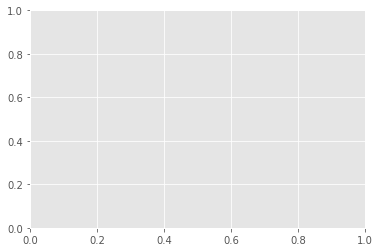

In [445]:
import numpy as np
print (np.mean(subjective_result), np.mean(objective_result))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
count = [a for a in range(1,101)]

plt.scatter(count, subjective_result, alpha=1, label='Subjective Patterns')
plt.scatter(count, objective_result, alpha=1, label='Objective Patterns')
plt.legend(loc=4)
plt.title('Threshold = 0.85')
plt.ylabel('Accuracy')
plt.xlabel('Execution Sequence')
plt.show()

In [329]:
########cross fold testing##########
#print len(S_data), len(O_data)
subjective_result = []
objective_result = []
count = 1
for b in range(100):
#     print ('No.',count,'experiment')
#     count += 1
    sub_accuracy = 0
    obj_accuracy = 0
    count_sub = 0
    count_obj = 0
    for a in range(10):
        S_data_sorting = sorted(S_data, key=lambda k: random.random()) # randomly sort data points
        O_data_sorting = sorted(O_data, key=lambda k: random.random())
        splitted_S_data = [S_data_sorting[i:i + (len(S_data)/10)+1] for i in range(0, len(S_data_sorting), (len(S_data)/10)+1)] #np.array(np.array_split(S_data_sorting,10,axis=0))
        splitted_O_data = [O_data_sorting[i:i + (len(O_data)/10)+1] for i in range(0, len(O_data_sorting), (len(O_data)/10)+1)] #np.array(np.array_split(O_data_sorting,10,axis=0))

        testing_S_data = splitted_S_data.pop(a)
        testing_O_data = splitted_O_data.pop(a)
        training_S_data = splitted_S_data
        training_O_data = splitted_O_data

        training_S_data1 = []
        for a in training_S_data:
            training_S_data1.extend(a)
        training_O_data1 = []  
        for a in training_O_data:
            training_O_data1.extend(a)

        countered_S = Counter(training_S_data1).items()
        countered_O = Counter(training_O_data1).items()
########################################################################################################        
        ###### all_S_percentages ########
#         all_S_percentages = []
#         for item_s, num_s in countered_S:
#             try:
#                 num_o = [b for a, b in countered_O if a==item_s][0]
#             except:
#                 continue
#             percentage_S = float(num_s)/(num_s+num_o) #
#             percentage_O = float(num_o)/(num_s+num_o)
#             all_S_percentages.append((item_s,percentage_S, num_s, num_o))
########################################################################################################
        all_O_percentages = []
        for item_o, num_o in countered_O:
            try:
                num_s = [b for a, b in countered_O if a==item_o][0]
            except:
                continue
            percentage_S = float(num_s)/(num_s+num_o) #
            percentage_O = float(num_o)/(num_s+num_o)
            all_O_percentages.append((item_o,percentage_O, num_s, num_o))
########################################################################################################     
        
        ######### testing for sub #########
#         subjective_patterns1 = []
#         objective_patterns1 = []
#         for item_s, percentage_S, num_s, num_o in all_S_percentages:
#             if percentage_S >= 0.90:
#                 subjective_patterns1.append(item_s)   
#             if percentage_S <= 0.10:
#                 objective_patterns1.append(item_s) 
########################################################################################################
        subjective_patterns2 = []
        objective_patterns2 = []
        for item_s, percentage_O, num_s, num_o in all_O_percentages:
            if percentage_O >= 0.90:
                objective_patterns2.append(item_o)   
            if percentage_O <= 0.10:
                subjective_patterns2.append(item_s)      
########################################################################################################
        Sub_positive1 = 0
        Obj_positive1 = 0
        Sub_negative1 = 0
        Obj_negative1 = 0
        for a in testing_S_data:
            if a in subjective_patterns1:
                Sub_positive1 += 1
            if a in objective_patterns1:
                Sub_negative1 += 1
        for a in testing_O_data:
            if a in subjective_patterns1:
                Obj_negative1 += 1
            if a in objective_patterns1:
                Obj_positive1 += 1
        try:
            count_sub1 += 1
            sub_accuracy1 += (float(Sub_positive1)/(Sub_positive1+Sub_negative1))   
        except:
            continue
        try:
            count_obj += 1
            obj_accuracy1 += (float(Obj_positive1)/(Obj_positive1+Obj_negative1))   
        except:
            continue    

            
    #         print ('Sub_positive, Obj_positive, Sub_negative, Obj_negative', Sub_positive, Sub_negative, Obj_positive, Obj_negative)
    #         print ('accuracies for subjective and objective patterns', float(Sub_positive)/(Sub_positive+Sub_negative), float(Obj_positive)/(Obj_positive+Obj_negative))
    #     print (len(training_S_data), len(testing_S_data))
    #     print (len(training_O_data), len(testing_O_data))
#     print sub_accuracy/count_sub, 'sub_accuracy'
#     print obj_accuracy/count_obj, 'obj_accuracy'
    subjective_result.append(sub_accuracy/count_sub)
    objective_result.append(obj_accuracy/count_obj)
print (subjective_result)
print (objective_result)
import matplotlib.pyplot as plt
count = [a for a in range(1,101)]

plt.scatter(count, subjective_result, alpha=1, c = 'r')
plt.scatter(count, objective_result, alpha=1, c = 'b')
plt.show()

ZeroDivisionError: integer division or modulo by zero

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


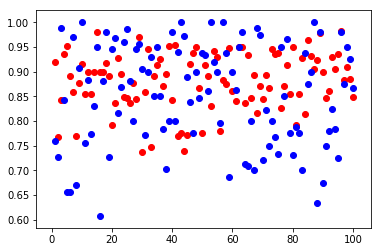

In [307]:

########cross fold testing##########
#print len(S_data), len(O_data)
subjective_result = []
objective_result = []
count = 1
for b in range(100):
#     print ('No.',count,'experiment')
#     count += 1
    sub_accuracy = 0
    obj_accuracy = 0
    count_sub = 0
    count_obj = 0
    for a in range(10):
        S_data_sorting = sorted(S_data, key=lambda k: random.random()) # randomly sort data points
        O_data_sorting = sorted(O_data, key=lambda k: random.random())
        splitted_S_data = [S_data_sorting[i:i + (len(S_data)/10)+1] for i in range(0, len(S_data_sorting), (len(S_data)/10)+1)] #np.array(np.array_split(S_data_sorting,10,axis=0))
        splitted_O_data = [O_data_sorting[i:i + (len(O_data)/10)+1] for i in range(0, len(O_data_sorting), (len(O_data)/10)+1)] #np.array(np.array_split(O_data_sorting,10,axis=0))

        testing_S_data = splitted_S_data.pop(a)
        testing_O_data = splitted_O_data.pop(a)
        training_S_data = splitted_S_data
        training_O_data = splitted_O_data

        training_S_data1 = []
        for a in training_S_data:
            training_S_data1.extend(a)
        training_O_data1 = []  
        for a in training_O_data:
            training_O_data1.extend(a)

        countered_S = Counter(training_S_data1).items()
        countered_O = Counter(training_O_data1).items()
        
        ###### all_S_percentages ########
        all_S_percentages = []
        for item_s, num_s in countered_S:
            try:
                num_o = [b for a, b in countered_O if a==item_s][0]
            except:
                continue
            percentage_S = float(num_s)/(num_s+num_o) #
            percentage_O = float(num_o)/(num_s+num_o)
            all_S_percentages.append((item_s,percentage_S, num_s, num_o))
        
        subjective_patterns1 = []
        objective_patterns1 = []
        for item_s, percentage_S, num_s, num_o in all_S_percentages:
            if percentage_S >= 0.90:
                subjective_patterns1.append(item_s)   
            if percentage_S <= 0.10:
                objective_patterns1.append(item_s) 
    #         print ('subjective_patterns',subjective_patterns) 
    #         print ('objective_patterns',objective_patterns)

    
        ######### testing for sub #########
        Sub_positive = 0
        Obj_positive = 0
        Sub_negative = 0
        Obj_negative = 0
        for a in testing_S_data:
            if a in subjective_patterns1:
                Sub_positive += 1
            if a in objective_patterns1:
                Sub_negative += 1
        for a in testing_O_data:
            if a in subjective_patterns1:
                Obj_negative += 1
            if a in objective_patterns1:
                Obj_positive += 1
        try:
            count_sub += 1
            sub_accuracy += (float(Sub_positive)/(Sub_positive+Sub_negative))   
        except:
            continue
        try:
            count_obj += 1
            obj_accuracy += (float(Obj_positive)/(Obj_positive+Obj_negative))   
        except:
            continue    

            
    #         print ('Sub_positive, Obj_positive, Sub_negative, Obj_negative', Sub_positive, Sub_negative, Obj_positive, Obj_negative)
    #         print ('accuracies for subjective and objective patterns', float(Sub_positive)/(Sub_positive+Sub_negative), float(Obj_positive)/(Obj_positive+Obj_negative))
    #     print (len(training_S_data), len(testing_S_data))
    #     print (len(training_O_data), len(testing_O_data))
#     print sub_accuracy/count_sub, 'sub_accuracy'
#     print obj_accuracy/count_obj, 'obj_accuracy'
    subjective_result.append(sub_accuracy/count_sub)
    objective_result.append(obj_accuracy/count_obj)
print (subjective_result)
print (objective_result)
import matplotlib.pyplot as plt
count = [a for a in range(1,101)]
print count
plt.scatter(count, subjective_result, alpha=1, c = 'r')
plt.scatter(count, objective_result, alpha=1, c = 'b')
plt.show()

In [185]:
###threshold = 0.9 

0.876031746032 sub_accuracy
0.916666666667 obj_accuracy
0.849206349206 sub_accuracy
0.846666666667 obj_accuracy
0.908333333333 sub_accuracy
0.835714285714 obj_accuracy
0.915714285714 sub_accuracy
0.935714285714 obj_accuracy
0.833333333333 sub_accuracy
0.87037037037 obj_accuracy
0.8725 sub_accuracy
0.95 obj_accuracy
0.905 sub_accuracy
0.725 obj_accuracy
0.860714285714 sub_accuracy
0.658333333333 obj_accuracy
0.958333333333 sub_accuracy
0.737142857143 obj_accuracy
0.839047619048 sub_accuracy
0.745714285714 obj_accuracy

#####threshold = 0.89

0.957777777778 sub_accuracy
0.908888888889 obj_accuracy
0.858333333333 sub_accuracy
0.972222222222 obj_accuracy
0.885714285714 sub_accuracy
0.974242424242 obj_accuracy
0.871428571429 sub_accuracy
0.965909090909 obj_accuracy
0.91 sub_accuracy
0.95 obj_accuracy
0.902777777778 sub_accuracy
0.955 obj_accuracy
0.7825 sub_accuracy
0.939464285714 obj_accuracy
0.889242424242 sub_accuracy
0.92619047619 obj_accuracy
0.838888888889 sub_accuracy
0.9875 obj_accuracy
0.746031746032 sub_accuracy
1.0 obj_accuracy

# threshold = 0.88
0.876984126984 sub_accuracy
0.964603174603 obj_accuracy
0.7875 sub_accuracy
0.916623376623 obj_accuracy
0.886666666667 sub_accuracy
0.933333333333 obj_accuracy
0.792045454545 sub_accuracy
0.977380952381 obj_accuracy
0.892857142857 sub_accuracy
0.965714285714 obj_accuracy
0.864444444444 sub_accuracy
0.975 obj_accuracy
0.784126984127 sub_accuracy
0.969736842105 obj_accuracy
0.746538461538 sub_accuracy
0.965714285714 obj_accuracy
0.95 sub_accuracy
0.934166666667 obj_accuracy
0.8675 sub_accuracy
0.9625 obj_accuracy

# threshold = 0.87
0.80630952381 sub_accuracy
0.966666666667 obj_accuracy
0.686407138613 sub_accuracy
0.992307692308 obj_accuracy
0.680952380952 sub_accuracy
0.9675 obj_accuracy
0.783737373737 sub_accuracy
0.981568627451 obj_accuracy
0.895833333333 sub_accuracy
0.954464285714 obj_accuracy
0.828517316017 sub_accuracy
0.969047619048 obj_accuracy
0.794047619048 sub_accuracy
0.928949579832 obj_accuracy
0.720707070707 sub_accuracy
0.967857142857 obj_accuracy
0.778095238095 sub_accuracy
0.969117647059 obj_accuracy
0.638304473304 sub_accuracy
0.977345537757 obj_accuracy
# threshold = 0.86
0.73496031746 sub_accuracy
0.940833333333 obj_accuracy
0.717063492063 sub_accuracy
0.959047619048 obj_accuracy
0.731764069264 sub_accuracy
0.985213032581 obj_accuracy
0.711634199134 sub_accuracy
0.976388888889 obj_accuracy
0.681468253968 sub_accuracy
0.90494047619 obj_accuracy
0.780079365079 sub_accuracy
0.97668128655 obj_accuracy
0.75876984127 sub_accuracy
0.9875 obj_accuracy
0.673650793651 sub_accuracy
0.966363636364 obj_accuracy
0.717799422799 sub_accuracy
0.984016636958 obj_accuracy
0.664583333333 sub_accuracy
0.994736842105 obj_accuracy

# threshold = 0.85
0.594585137085 sub_accuracy
0.967359307359 obj_accuracy
0.585549450549 sub_accuracy
0.977045454545 obj_accuracy
0.644314019314 sub_accuracy
0.978378298688 obj_accuracy
0.574686147186 sub_accuracy
0.967314448836 obj_accuracy
0.684998334998 sub_accuracy
0.99375 obj_accuracy
0.734076479076 sub_accuracy
0.975706521739 obj_accuracy
0.62917027417 sub_accuracy
0.969868131868 obj_accuracy
0.635317460317 sub_accuracy
0.942952069717 obj_accuracy
0.586837606838 sub_accuracy
0.991666666667 obj_accuracy
0.800865800866 sub_accuracy
0.970833333333 obj_accuracy

[3, 2, 4, 1]


In [133]:
########cross fold testing##########
import math
from sklearn import svm
import numpy as np
import re
import random



np_S_data = [] #transform string to numpy array for subjective data
for a in S_data:
#     if 7 in [int(b) for b in re.findall(r"\d+\.?\d*", a)]:
#         pass
#     if [int(b) for b in re.findall(r"\d+\.?\d*", a)].count(0) == 2:
#         continue
#     else:
    np_S_data.append(np.array([int(b) for b in re.findall(r"\d+\.?\d*", a)]))
np_S_data = np.array(np_S_data)
print np_S_data.shape
np_O_data = [] #transform string to numpy array for objective data
for a in O_data:
#     if 7 in [int(b) for b in re.findall(r"\d+\.?\d*", a)]:
#         continue
#     if [int(b) for b in re.findall(r"\d+\.?\d*", a)].count(0) == 2:
#         continue
#     else:
    np_O_data.append(np.array([int(b) for b in re.findall(r"\d+\.?\d*", a)]))
np_O_data = np.array(np_O_data)
print np_O_data.shape

len_S_data = int(len(np_S_data))
len_O_data = int(len(np_O_data))

n1 = int(math.ceil(len_S_data/2.0)) # subjective data splitting
n2 = int(math.ceil(len_O_data/2.0)) # objective data splitting

splitted_S_data = np.array(np.array_split(np_S_data,10,axis=0))
splitted_O_data = np.array(np.array_split(np_O_data,10,axis=0))
#print ((splitted_S_data[0]).shape,type(splitted_S_data))

####four_metics.csv
path_sub = 'data/MPQA_files/result/four_metics_subjective.csv'
path_obj = 'data/MPQA_files/result/four_metics_subjective.csv'
def write_csv(path, data_row):
    with open(path,'a+') as f:
        csv_write = csv.writer(f)
        csv_write.writerow(data_row)

SUM_accuracy = 0
SUM_Precision =  0
SUM_recall = 0
SUM_Fscore = 0

#write_csv(path_write, [])

for loop_num in range(10):   
    splitted_S_data = sorted(splitted_S_data, key=lambda k: random.random())
    for fold in range(2):
        print 'Expriment:', fold+1
        testing_S_data = splitted_S_data[fold]
        testing_O_data = splitted_O_data[fold]
        merged_testing_data = np.vstack((testing_S_data, testing_O_data))

        label_S_testing = list(np.zeros(testing_S_data.shape[0], dtype = np.int))
        label_O_testing = list(np.ones(testing_O_data.shape[0], dtype = np.int))
        merged_testing_label = label_S_testing + label_O_testing
        training_S_data = None

        for a in (np.delete(splitted_S_data, fold)): #concatenate O training data
            if training_S_data is None:
                training_S_data = a
            else:
                training_S_data = np.vstack((training_S_data, a))
        training_O_data = None
        for a in (np.delete(splitted_O_data, fold)): #concatenate S training data
            if training_O_data is None:
                training_O_data = a
            else:
                training_O_data = np.vstack((training_O_data, a)) 

        label_S_training = list(np.zeros(training_S_data.shape[0], dtype = np.int))
        label_O_training = list(np.ones(training_O_data.shape[0], dtype = np.int))
        clf = svm.SVC()
        X = np.vstack((training_S_data, training_O_data))    
        y = label_S_training + label_O_training
        clf.fit(X, y)

    #     print 'Lengthes of training S and O data are', len(label_S_training), len(label_O_training)

    #     print 'Lengthes of testing S and O data are',len(testing_S_data), len(testing_O_data)
    #     #print X
        result = []
        for testing_item in merged_testing_data:
            #print testing_item
            result.append(clf.predict([testing_item])[0])
        if len(result) == len(merged_testing_label):
            print '# of testing data', len(result)
            print '# of true positives', len([i for i, j in zip(result, merged_testing_label) if i == j ==0])
            print '# of false positives', result.count(0) - len([i for i, j in zip(result, merged_testing_label) if i == j == 0])
            print '# of true negatives', len([i for i, j in zip(result, merged_testing_label) if i == j ==1])
            print '# of false negatives', result.count(1) - len([i for i, j in zip(result, merged_testing_label) if i == j ==1])
            print float(len([i for i, j in zip(result, merged_testing_label) if i == j]))/len(result)
            num_0 = len([i for i, j in zip(result, merged_testing_label) if i == j == 0]) # all detected 0
            num_1 = len([i for i, j in zip(result, merged_testing_label) if i == j == 1]) # all detected 1

            label_0 = merged_testing_label.count(0) # all label 0
            label_1 = merged_testing_label.count(1) # all label 1

            result_0 = result.count(0) # all 0 in result
            result_1 = result.count(1) # all 1 in result
            print num_0,num_1,result_0,result_1
            accuracy = float(num_0+num_1)/len(result)

#             Precision =  float(num_1)/result_1
#             recall = float(num_1)/label_1
            Precision =  float(num_0)/result_0
            recall = float(num_0)/label_0
            Fscore = (2*Precision*recall)/(recall+Precision)


            SUM_accuracy += accuracy
            SUM_Precision += Precision
            SUM_recall += recall
            SUM_Fscore += Fscore
            write_csv

        else:
            print 'exception'
        
print 'Accuracy', SUM_accuracy/20
print 'Precision', SUM_Precision/20
print 'Recall', SUM_recall/20
print 'F-score', SUM_Fscore/20
    

(3342, 3)
(4228, 3)
Expriment: 1
# of testing data 757
# of true positives 132
# of false positives 124
# of true negatives 299
# of false negatives 202
0.569352708058
132 299 256 501
Expriment: 2
# of testing data 758
# of true positives 165
# of false positives 142
# of true negatives 281
# of false negatives 170
0.588390501319
165 281 307 451
Expriment: 1
# of testing data 757
# of true positives 151
# of false positives 124
# of true negatives 299
# of false negatives 183
0.594451783355
151 299 275 482
Expriment: 2
# of testing data 757
# of true positives 153
# of false positives 142
# of true negatives 281
# of false negatives 181
0.573315719947
153 281 295 462
Expriment: 1
# of testing data 758
# of true positives 139
# of false positives 124
# of true negatives 299
# of false negatives 196
0.577836411609
139 299 263 495
Expriment: 2
# of testing data 757
# of true positives 165
# of false positives 142
# of true negatives 281
# of false negatives 169
0.589167767503
165 281 307 

In [ ]:
for 0 #subjective data 
# 2 folds
Accuracy 0.830286107335
Precision 0.942713213151
Recall 0.493703703704
F-score 0.646892532012

Accuracy 0.834297554751
Precision 0.957234170081
Recall 0.497777777778
F-score 0.654192216997

Accuracy 0.829484941671
Precision 0.956166458574
Recall 0.482407407407
F-score 0.640430785673



# 10 folds
Accuracy 0.830429735731
Precision 0.943126397859
Recall 0.493703703704
F-score 0.647131804375

for 1 # objective data

#2 folds
Accuracy 0.830286107335
Precision 0.808287589031
Recall 0.985960072935
F-score 0.888257585953

Accuracy 0.837830133709
Precision 0.813671330513
Recall 0.989731871523
F-score 0.893065372344

# 10folds
Accuracy 0.830382058955
Precision 0.808261891217
Recall 0.986165552387
F-score 0.888334691244





In [ ]:
for 1 
Accuracy 0.670885161154
Precision 0.659610338623
Recall 0.968088418431
F-score 0.784580021579

for 0
Accuracy 0.668766365092
Precision 0.778323726655
Recall 0.182423747277
F-score 0.294824126481


In [ ]:
import os 

g = os.walk(r"data/MPQA_files/marktwain/")  

for path,dir_list,file_list in g:  
    for file_name in file_list:  
        if file_name == 'markup.txt':
            
            print os.path.join(path, file_name)

In [75]:
def run_object(varible):
    if len(varible) == 0:
        return 0
    else:
        if 1 in varible:
            return 1
        elif 2 in varible:
            return 2
        elif 3 in varible:
            return 3
        elif len(Counter(varible)) > 1:
            while 0 in varible:       
                varible.remove(0)  
            print varible,'varible'
            return Counter(varible).most_common(1)[0][0]
        else:
            return Counter(varible).most_common(1)[0][0]
a = [0,0,0]
print a

print Counter(a).most_common(1)[0][0], len(Counter(a))
run_object(a)

[0, 0, 0]
0 1


0